<h1>SPAM DETECTION<h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2>1. Read Dataset<h2>

[Link Dataset](https://github.com/MWiechmann/enron_spam_data/blob/master/enron_spam_data.zip)

In [2]:
data = pd.read_csv("enron_spam_data.csv", encoding="latin1")
data.head()

,Message ID,Subject,Message,Spam/Ham,Date
0,0,christmas tree farm pictures,NaN,ham,1999-12-10
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham,1999-12-13
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,1999-12-14
3,3,re : issue,fyi - see note below - already done .\nstella\...,ham,1999-12-14
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham,1999-12-14


In [3]:
data.columns

Index(['Message ID', 'Subject', 'Message', 'Spam/Ham', 'Date'], dtype='object')

<h4>Drop Columns<h4>

In [4]:
data.drop(columns=["Message ID", "Date"], axis=1, inplace=True)
data.head()

,Subject,Message,Spam/Ham
0,christmas tree farm pictures,NaN,ham
1,"vastar resources , inc .","gary , production from the high island larger ...",ham
2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham
3,re : issue,fyi - see note below - already done .\nstella\...,ham
4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham


<h4>Rename Columns<h4>

In [5]:
data = data.rename(columns={"Spam/Ham":"Label"})

In [6]:
data.head()

,Subject,Message,Label
0,christmas tree farm pictures,NaN,ham
1,"vastar resources , inc .","gary , production from the high island larger ...",ham
2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham
3,re : issue,fyi - see note below - already done .\nstella\...,ham
4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham


<h4>Check and Remove NaN<h4>

In [7]:
data.isnull().sum()

Subject    289
Message    371
Label        0
dtype: int64

In [8]:
data = data.dropna()

In [9]:
data.isnull().sum()

Subject    0
Message    0
Label      0
dtype: int64

<h4>Check and Remove Duplicate<h4>

In [10]:
data.duplicated().sum()

3071

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data.duplicated().sum()

0

<h2>2. Label Chart<h2>

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
data.shape

(30036, 3)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30036 entries, 1 to 33714
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Subject  30036 non-null  object
 1   Message  30036 non-null  object
 2   Label    30036 non-null  object
dtypes: object(3)
memory usage: 938.6+ KB


In [16]:
data['Label'].value_counts()

Label
ham     15861
spam    14175
Name: count, dtype: int64

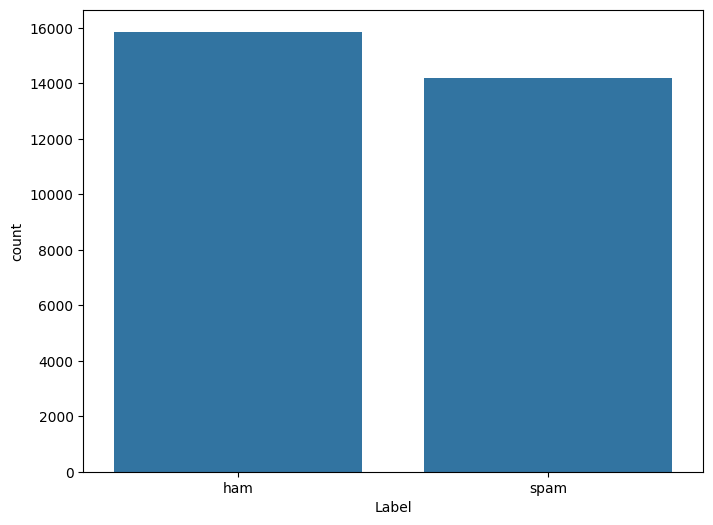

In [17]:
plt.figure(figsize=(8,6))
sns.countplot(x="Label",data=data)
plt.show()

<h4>Feature Label Mapping<h4>

In [18]:
data["Label"] = data.Label.map({'ham':0,'spam':1})
data.head()

,Subject,Message,Label
1,"vastar resources , inc .","gary , production from the high island larger ...",0
2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,0
3,re : issue,fyi - see note below - already done .\nstella\...,0
4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,0
5,mcmullen gas for 11 / 99,"jackie ,\nsince the inlet to 3 river plant is ...",0


<h4>Text Length Analysis

In [19]:
import nltk
nltk.download('punkt') #Downloading tokenizer (word_tokenize, sent_tokenize) data


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Welcome\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
data["num_char"] = data["Message"].apply(len)
data["num_word"] = data["Message"].apply(lambda x: len(nltk.word_tokenize(x)))
data["num_sent"] = data["Message"].apply(lambda x: len(nltk.sent_tokenize(x)))

# Get number sentence in Message
# li = []
# for i in data['Message']:
#     li.append(len(nltk.sent_tokenize(i)))
# data["num_sent"] = li
# data.head()

In [21]:
data[["num_char", "num_word", "num_sent"]].describe()

,num_char,num_word,num_sent
count,30036.000000,30036.000000,30036.000000
mean,1456.343122,302.241244,18.465441
std,4149.061764,827.029495,56.379534
min,1.000000,1.000000,1.000000
25%,321.000000,67.000000,5.000000
50%,690.000000,149.000000,9.000000
75%,1533.000000,328.000000,19.000000
max,228353.000000,45450.000000,3093.000000


In [22]:
data.head()

,Subject,Message,Label,num_char,num_word,num_sent
1,"vastar resources , inc .","gary , production from the high island larger ...",0,4282,1572,23
2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,0,38,8,2
3,re : issue,fyi - see note below - already done .\nstella\...,0,1171,344,7
4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,0,1124,318,8
5,mcmullen gas for 11 / 99,"jackie ,\nsince the inlet to 3 river plant is ...",0,534,119,6


In [23]:
data[data['Label'] == 0][["num_char", "num_word", "num_sent"]].describe() # Ham

,num_char,num_word,num_sent
count,15861.000000,15861.000000,15861.000000
mean,1598.129374,341.117710,18.806948
std,5402.426579,1076.676219,65.048247
min,1.000000,1.000000,1.000000
25%,312.000000,67.000000,4.000000
50%,764.000000,169.000000,9.000000
75%,1642.000000,362.000000,18.000000
max,228353.000000,45450.000000,2827.000000


In [24]:
data[data['Label'] == 1][["num_char", "num_word", "num_sent"]].describe() # Spam

,num_char,num_word,num_sent
count,14175.000000,14175.000000,14175.000000
mean,1297.692557,258.740741,18.083316
std,1942.356472,385.560516,44.729938
min,1.000000,1.000000,1.000000
25%,326.000000,67.000000,5.000000
50%,622.000000,130.000000,10.000000
75%,1382.500000,275.000000,20.000000
max,28692.000000,8386.000000,3093.000000


<h4>Distribution of Spam and Ham by Length of Message

Text(0.5, 1.0, 'Distribution of Number of Characters')

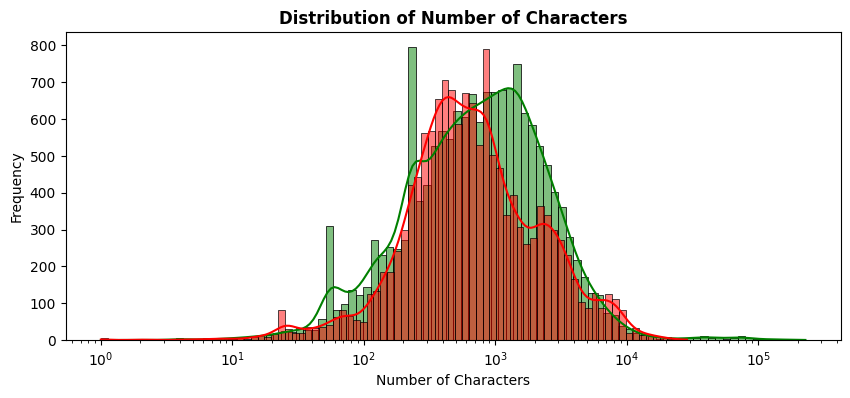

In [25]:
# Create figure and set size
plt.figure(figsize=(10, 4))

# The chart for Ham is Green
sns.histplot(data[data['Label'] == 0]['num_char'], color='Green', label='Ham', log_scale=True, kde=True)

# The chart for Spam is red
sns.histplot(data[data['Label'] == 1]['num_char'], color='red', label='Spam', log_scale=True, kde=True)

# Column, row name and title
plt.ylabel('Frequency')
plt.xlabel('Number of Characters')
plt.title('Distribution of Number of Characters', fontweight='bold')


Text(0.5, 1.0, 'Distribution of Number of Words')

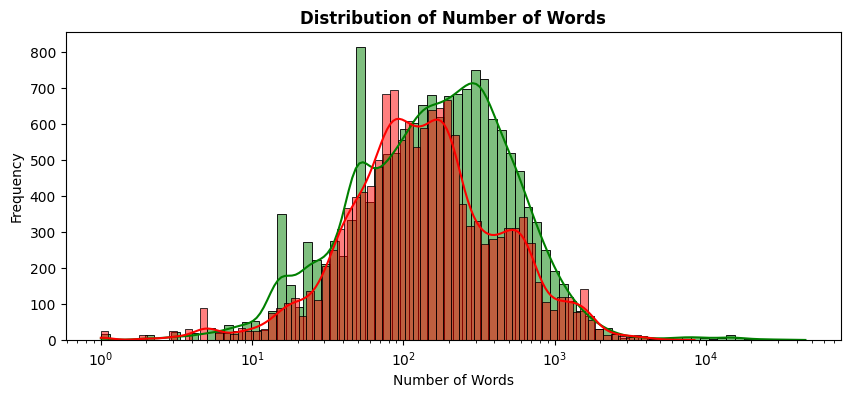

In [26]:
# Create figure and set size
plt.figure(figsize=(10, 4))

# The chart for Ham is Green
sns.histplot(data[data['Label'] == 0]['num_word'], color='Green', label='Ham', log_scale=True, kde=True)

# The chart for Spam is red
sns.histplot(data[data['Label'] == 1]['num_word'], color='red', label='Spam', log_scale=True, kde=True)

# Column, row name and title
plt.ylabel('Frequency')
plt.xlabel('Number of Words')
plt.title('Distribution of Number of Words', fontweight='bold')

Text(0.5, 1.0, 'Distribution of Number of Sentences')

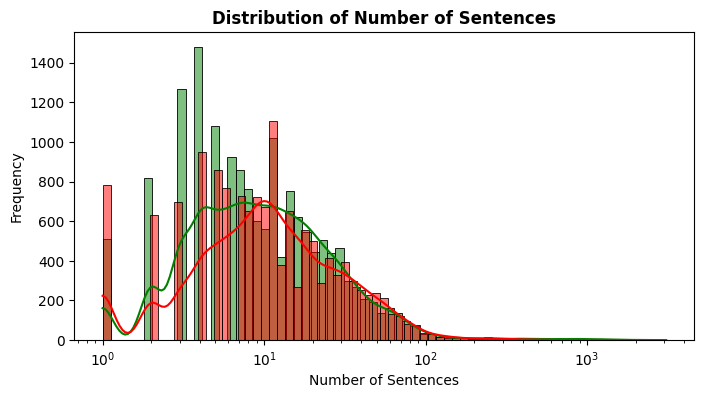

In [27]:
# Create figure and set size
plt.figure(figsize=(8, 4))

# The chart for Ham is Green
sns.histplot(data[data['Label'] == 0]['num_sent'], color='Green', label='Ham', log_scale=True, kde=True)

# The chart for Spam is red
sns.histplot(data[data['Label'] == 1]['num_sent'], color='red', label='Spam', log_scale=True, kde=True)

# Column, row name and title
plt.ylabel('Frequency')
plt.xlabel('Number of Sentences')
plt.title('Distribution of Number of Sentences', fontweight='bold')

Clean Message

In [28]:
import re
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords') #Downloading stopwords data for clean Message

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Welcome\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
def clean_mess(text):
    # Remove special characters and digits
    text = re.sub(r"[^a-zA-Z]", " ", text)

    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Remove emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # Convert to lowercase
    text = text.lower()

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]

    return ' '.join(tokens)

In [30]:
# Test clean message
clean_mess('Banks rarely text their customers with important information or updates. Scammers frequently pose as banks to trick customers into revealing valuable information.Example: ACTION REQUIRED. Please verify your Bank of America account information to avoid a hold on your account. Click here to confirm: [Link]')

'banks rarely text customers important information updates scammers frequently pose banks trick customers revealing valuable information example action required please verify bank america account information avoid hold account click confirm link'

In [31]:
data["clean_mess"] = data['Message'].apply(clean_mess)
data.head()

,Subject,Message,Label,num_char,num_word,num_sent,clean_mess
1,"vastar resources , inc .","gary , production from the high island larger ...",0,4282,1572,23,gary production high island larger block comme...
2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,0,38,8,2,calpine daily gas nomination doc
3,re : issue,fyi - see note below - already done .\nstella\...,0,1171,344,7,fyi see note already done stella forwarded ste...
4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,0,1124,318,8,fyi forwarded lauri allen hou ect pm kimberly ...
5,mcmullen gas for 11 / 99,"jackie ,\nsince the inlet to 3 river plant is ...",0,534,119,6,jackie since inlet river plant shut last day f...


In [32]:
data["clean_subject"] = data['Subject'].apply(clean_mess)
data.head()

,Subject,Message,Label,num_char,num_word,num_sent,clean_mess,clean_subject
1,"vastar resources , inc .","gary , production from the high island larger ...",0,4282,1572,23,gary production high island larger block comme...,vastar resources inc
2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,0,38,8,2,calpine daily gas nomination doc,calpine daily gas nomination
3,re : issue,fyi - see note below - already done .\nstella\...,0,1171,344,7,fyi see note already done stella forwarded ste...,issue
4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,0,1124,318,8,fyi forwarded lauri allen hou ect pm kimberly ...,meter nov allocation
5,mcmullen gas for 11 / 99,"jackie ,\nsince the inlet to 3 river plant is ...",0,534,119,6,jackie since inlet river plant shut last day f...,mcmullen gas


<h2>Model

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # convert a collection of raw documents to a matrix
from scipy.sparse import csr_matrix

<h4>Drop Columns<h4>

In [34]:
data.drop(['num_char', 'num_word', 'num_sent',], inplace=True, axis=1)
data.head()

,Subject,Message,Label,clean_mess,clean_subject
1,"vastar resources , inc .","gary , production from the high island larger ...",0,gary production high island larger block comme...,vastar resources inc
2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,0,calpine daily gas nomination doc,calpine daily gas nomination
3,re : issue,fyi - see note below - already done .\nstella\...,0,fyi see note already done stella forwarded ste...,issue
4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,0,fyi forwarded lauri allen hou ect pm kimberly ...,meter nov allocation
5,mcmullen gas for 11 / 99,"jackie ,\nsince the inlet to 3 river plant is ...",0,jackie since inlet river plant shut last day f...,mcmullen gas


<h4>Merge Clean Subject and Clean Message

In [35]:
data['convert_mess'] = data['clean_subject'] + " " + data['clean_mess']
data.head()

,Subject,Message,Label,clean_mess,clean_subject,convert_mess
1,"vastar resources , inc .","gary , production from the high island larger ...",0,gary production high island larger block comme...,vastar resources inc,vastar resources inc gary production high isla...
2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,0,calpine daily gas nomination doc,calpine daily gas nomination,calpine daily gas nomination calpine daily gas...
3,re : issue,fyi - see note below - already done .\nstella\...,0,fyi see note already done stella forwarded ste...,issue,issue fyi see note already done stella forward...
4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,0,fyi forwarded lauri allen hou ect pm kimberly ...,meter nov allocation,meter nov allocation fyi forwarded lauri allen...
5,mcmullen gas for 11 / 99,"jackie ,\nsince the inlet to 3 river plant is ...",0,jackie since inlet river plant shut last day f...,mcmullen gas,mcmullen gas jackie since inlet river plant sh...


<h4>Split into Train and Test Data

In [36]:
# Bug file .npy is null (fixed) convert to array (enforce data type to csr_matrix and return .toarray)
#X=tf.fit_transform(data[['clean_mess', 'clean_subject',]])
#print(X)

In [37]:
# X, Y Variable and convert a collection of raw documents to a matrix
tf=TfidfVectorizer(max_features = 3000)

X=tf.fit_transform(data['convert_mess'])
Y=data[['Label',]]

# train and test subsets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.8, test_size=0.2, random_state=0)

# print(type(X_train))

X_train = csr_matrix(X_train)
X_test = csr_matrix(X_test)

# print(type(X_train))
#print(np.asarray(X_train))

X_train = np.asarray(X_train.toarray())
X_test = np.asarray(X_test.toarray())
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

# print(type(X_train))
# print(type(Y_train))

# Save X_train, X_test, Y_train, Y_test
np.save('x_train.npy',X_train)
np.save('y_train.npy',Y_train)
np.save('x_test.npy',X_test)
np.save('y_test.npy',Y_test)

(24028, 3000) (6008, 3000)
(24028, 1) (6008, 1)


Save tf Vector

In [38]:
import pickle
from joblib import dump

In [39]:
vec_file = 'vectorizer.joblib'
dump(tf, open(vec_file, 'wb'))

<h1>---------------------------------------END------------------------------------------

<h4>Decision Tree (Test Model)

In [40]:
from sklearn.tree import DecisionTreeClassifier
import time

In [41]:
dt_model = DecisionTreeClassifier(random_state=1)

Train Time

In [42]:
start_time = time.time()
result = dt_model.fit(X_train, Y_train)
end_time = time.time()
print("Time: ", end_time - start_time)

Time:  109.68275213241577


In [43]:
Y_pred = result.predict(X_test)
accurate = accuracy_score(Y_test,Y_pred)
print("accurate: ", accurate)

print("Train score is:", dt_model.score(X_train, Y_train))
print("Test score is:",dt_model.score(X_test,Y_test))

accurate:  0.9515645805592543
Train score is: 0.9997919094389879
Test score is: 0.9515645805592543


<h4>Message Test

In [44]:
from joblib import load

In [45]:
# load the vectorizer
loaded_vectorizer = load(open('vectorizer.joblib', 'rb'))

In [46]:
#mail_data = ["LastPass Security Notice Dear LastPass User,We wanted to alert you that, recently, our team discovered and immediately blocked suspicious activity on our network. Some user vault data was taken including email addresses and passwords.To be sure that your information was NOT compromised, we have built this secure web site where you can enter your last pass login information and we can tell you if your account was one that was compromised.We apologize for the inconvenience, but ultimately we believe this will better protect LastPass users. Thank you for your understanding, and for using LastPass.Regards,The LastPass Team"]

#mail_data = ["I hope all is well. I had fun meeting you and designing our Career Focused Project together on Tuesday. I know we agreed that I would make a PowerPoint presentation, but I don't have any way to save my work after each session. Could you please bring a jump drive to next session? If you can't, I will ask Ms. Johnson for one tomorrow.I am also interested in learning the importance of teamwork at your job. What do you think makes someone an effective team player in the workforce? What type of team assignments do you normally work on? Do you prefer working in teams or on your own? Thank you for taking the time to answer my questions and I look forward to hearing from you.Sincerely,Derrick Smith"]
#mail_data = ["Hi Jordan, I'm doing research on digital marketing and discovered that a lot of businesses lack a solid inbound strategy. Is that the case for you also? If so, I stumbled upon this article that you might find useful. It explains why inbound marketing is such a difficult endeavor and how the top performers in digital marketing have overcome it.I'm finding a lot of useful content and industry insights in my research lately. Would you be interested in chatting about them over coffee next week? Kind regards, Kris Poole"]
#mail_data = ["A new email address, authenticator app, or phone number has been added to your account. This information will be used to provide additional security when accessing DocuSign. Please log in to your DocuSign account to change your settings."]
#mail_data = ["Verify your email Please verify your email by clicking on the link below: BLACKBOX.AI is a coding LLM designed to transform the way we build software. By building BLACKBOX.AI, our goal is to: Accelerate the pace of innovation within companies by making engineers 10X faster in building and releasing products Accelerate the growth in software engineers around the world and 10X the number of engineers from ~100M to 1B Designed and built in San Francisco, CA"]
mail_data = ['XJS*C4JDBQADN1.NSBN3*2IDNEN*GTUBE-STANDARD-ANTI-UBE-TEST-EMAIL*C.34X']
data_transformed = tf.transform(mail_data)

print(data_transformed)

predictions = result.predict(data_transformed)

if predictions==0:
    print("Message is Ham")
else:
    print("Message is Spam")

  (0, 2666)	0.5467933220188682
  (0, 2537)	0.5076911276197568
  (0, 836)	0.2945172565443425
  (0, 136)	0.5970982896720977
Message is Spam
